# Assignment 3: Non-Linear Classification with SVM

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia

In this assignment, you will implement your own version of SVM with kernels to classify non-linear data. For references, you may refer to my [lecture 10](https://drive.google.com/open?id=1CeBhepjDKBaFBq2BZq-zNQs-MC8ll7aL4qAF8TJ24FM) and [lecture 10b](https://drive.google.com/open?id=13BidUAs_c2QdZkf92axt2S748sbnbI9Hgxg-fzb-OuU) or Chapter 5 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit **this** Jupyter Notebook file (.ipynb) to earn a total of 100 pts. Note that you must save your Notebook filename under this format: **yourUvaUserId_assignment_3_svm.ipynb**.


## 1. DATA SET AND VISUALIZATION FUNCTION
We will use the non-linear toy data called the Moon dataset. You may use the code snippet below to generate the train/test set. Feel free to change the number of samples, and noise level. Additionally, a function plot_svm() is provided to help you visualize the decision boundary, margin, and support vectors on the dataset in 2D feature space.

The provided function plot_svm() works out-the-box, and is the best way to visualize and evaluate the performance of your model. It assumes the classifier has an instance variable "self.support_vectors_", which is a numpy array of the support vectors found in training. DO NOT modify this function. Once your implementation in Task 3 is complete, the plots generated for your model should look similar to the plots generated for the standard library models in Task 2.

In [5]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
import numpy as np

X, y = make_moons (n_samples = 500, noise = 0.15, random_state = 49)
y = y*2-1.0 # convert the labels from {0,1} to {-1, +1}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

import matplotlib.pyplot as plt

def plot_svm (clf, X, y, axes=[-2, 3, -2, 2]):
    """
    Generate a simple plot of SVM including the decision boundary, margin, and its training data

    Parameters
    ----------
    clf: your classifier handle
    X: feature matrix shape(m_samples, n_features)
    y: label vector shape(m_samples, )
    axes: (optional) the axes of the plot in format [xmin, xmax, ymin, ymax]
    """
    # Create a mesh grid based on the provided axes (100 x 100 resolution)
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s,x1s) # create a mesh grid
    X_mesh = np.c_[x0.ravel(), x1.ravel()] # convert all mesh points into 2-D points
    y_pred = clf.predict(X_mesh).reshape(x0.shape) # predict then covert back to the 2-D
    y_decision = clf.decision_function(X_mesh).reshape(x0.shape)

    plt.figsize=(16, 9)
    plt.plot(X[:, 0][y==-1], X[:, 1][y==-1], "bo", label="Class -1")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "go", label="Class +1")
    # Plot out the support vectors (in red)
    plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=80, c="r", label="Support Vectors")
    # Plot decision boundary and margins
    plt.contourf(x0,x1, y_pred, cmap = plt.cm.brg, alpha = 0.1)
    plt.contourf(x0,x1, y_decision, cmap = plt.cm.brg, alpha = 0.2)
    plt.contour(x0, x1, y_decision, colors='k',
                 levels=[-1, 0, 1], alpha=0.5,
                 linestyles=['--', '-', '--'])
    plt.legend(loc="lower right")
    plt.axis("auto")

    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

- - -
## 2. TRAIN SVM FOR CLASSIFICATION TASK

Use the standard libarary SVM classifier (SVC) on the training data, and then test the classifier on the test data. You will need to call SVM with 3 kernels: (1) Linear, (2) Polynomial and (3) Gaussian RBF.

You should tune each model using a grid search or similar hyperparameter selection process, and report the best hyperparameters found. You will use these same hyperparameter settings later when testing and comparing to your implementation in Task 4. Once you've selected the best hyperparameters for each kernel, you will need to report the following:

* Confusion matrix, Recall, and Precision. If applicable, discuss any tuning process on C and/or gamma to get to a reasonable result.
* Use the provided plot_svm() to visualize the SVM in 2D. This might give you some insight on how SVM determines the margin and support vector on the Moon dataset.


In [77]:
from scipy.sparse import random
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Instantiate the three different types of SVM Classifiers
linearSVM = SVC(kernel="linear", random_state=42)
polySVM = SVC(kernel="poly", random_state=42)
gaussianSVM = SVC(kernel="rbf", random_state=42)

# LINEAR
# perform grid search for Linear, Poly, and Gaussian SVM to best determine their hyperparams
# ran it with precision, recall, and accuracy scoring and then chose the model that performed best on test data
lin_grid_search = GridSearchCV(linearSVM, param_grid={'C':[0.5,1,2,3,5]}, cv=5, scoring="precision")
lin_grid_search.fit(X_train, y_train)

# figuring out the best combo for hyper+estimators
print(lin_grid_search.best_params_)
print(lin_grid_search.best_estimator_)
print("-------------------------------------------")

# POLY
# ran it with precision, recall, and accuracy scoring and then chose the model that performed best on test data
poly_grid_search = GridSearchCV(polySVM, param_grid={'C':[0.5,1,2,5], 'degree':[1,2,3,5], 'coef0':[1,5,10,20]}, cv=5, scoring="precision")
poly_grid_search.fit(X_train, y_train)

# figuring out the best combo for hyper+estimators
print(poly_grid_search.best_params_)
print(poly_grid_search.best_estimator_)
print("-------------------------------------------")

# GAUSSIAN
# ran it with precision, recall, and accuracy scoring and then chose the model that performed best on test data
# recall technically has the best values but the plot looks super overfit while precision is very close with less overfitting and smaller C
gaussian_grid_search = GridSearchCV(gaussianSVM, param_grid={'C':[0.5,1,2,5,10,20], 'gamma':[0.1, 0.2, 0.5, 1, 2, 5]}, cv=5, scoring="precision")
gaussian_grid_search.fit(X_train, y_train)

# figuring out the best combo for hyper+estimators
print(gaussian_grid_search.best_params_)
print(gaussian_grid_search.best_estimator_)
print("-------------------------------------------")

{'C': 2}
SVC(C=2, kernel='linear', random_state=42)
-------------------------------------------
{'C': 0.5, 'coef0': 1, 'degree': 5}
SVC(C=0.5, coef0=1, degree=5, kernel='poly', random_state=42)
-------------------------------------------
{'C': 5, 'gamma': 0.5}
SVC(C=5, gamma=0.5, random_state=42)
-------------------------------------------


GAUSSIAN MODEL
[[42  3]
 [ 0 55]]
0.9482758620689655
1.0
0.97


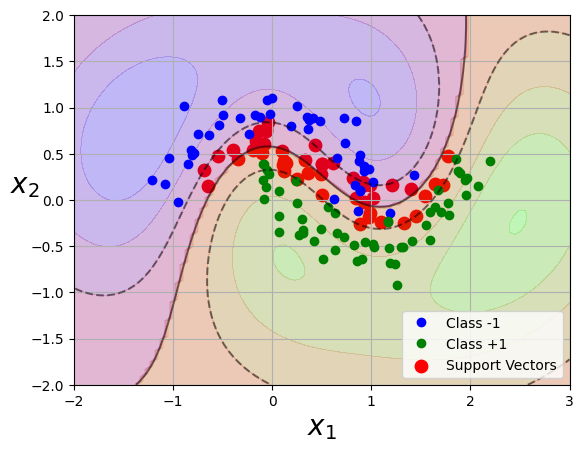

In [78]:
from sklearn import metrics
from sklearn.svm import SVC
print("GAUSSIAN MODEL")
# Train model selected by grid search above
gaussian = SVC(C=5, gamma=0.5, random_state=42)
gaussian.fit(X_train, y_train)
# make predictions on the testing set
y_pred = gaussian.predict(X_test)

# plot the model using provided plot_svm
plot_svm(gaussian, X_test, y_test)
# code for precision/recall/confusion from sklearn docs: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

POLY MODEL
[[42  3]
 [ 0 55]]
0.9482758620689655
1.0
0.97


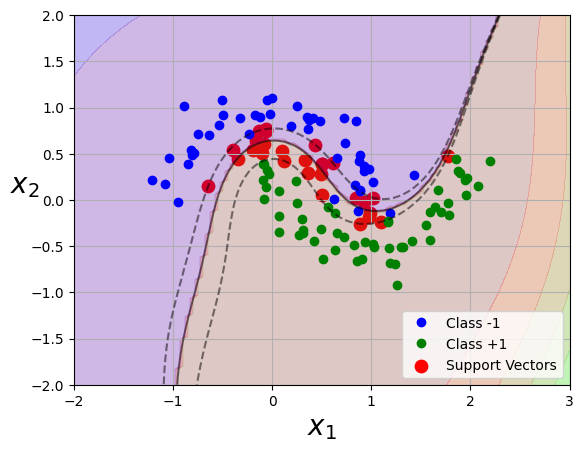

In [12]:
from sklearn import metrics
from sklearn.svm import SVC
print("POLY MODEL")
# Train model selected by grid search above
poly = SVC(C=0.5, coef0=1, degree=5, kernel='poly', random_state=42)
poly.fit(X_train, y_train)
# make predictions on the testing set
y_pred = poly.predict(X_test)

# plot the model using provided plot_svm
plot_svm(poly, X_test, y_test)
# code for precision/recall/confusion from sklearn docs: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

LINEAR MODEL
[[34 11]
 [ 5 50]]
0.819672131147541
0.9090909090909091
0.84


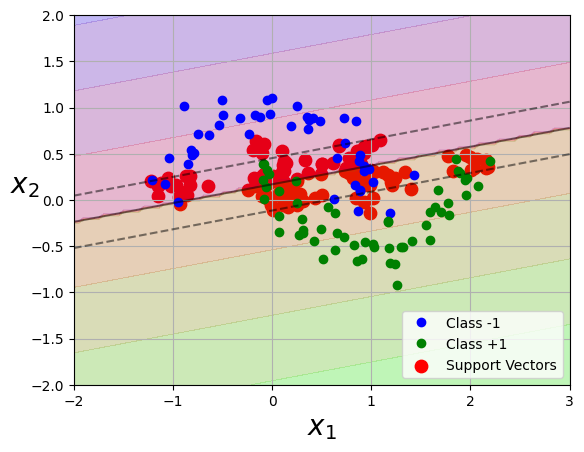

In [19]:
from sklearn.svm import SVC
from sklearn import metrics
print("LINEAR MODEL")
# Train model selected by grid search above
final_linear = SVC(kernel="linear", C=2, random_state=42)
final_linear.fit(X_train, y_train)
# make predictions on the testing set
y_pred = final_linear.predict(X_test)

# plot the model using provided plot_svm
plot_svm(final_linear, X_test, y_test)
# code for precision/recall/confusion from sklearn docs: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

## 3. IMPLEMENT YOUR OWN NON-LINEAR SVM
Now that you see how the standard library SVM perform on the dataset, you will attempt to implement your own version of SVM. To help you, a template of SVM has been created including the quadratic optimization. Essensially, you will get the optimized value of $\alpha$ for free. Note that there are **6 subtasks** which you need to implement in order to get the SVM to work properly.

The provided code is extensively documented in comments, so that you may write code compatible with it. DO NOT edit the provided code, but read the comments and ask Piazza questions as necessary to understand it.

Many of these tasks are made much easier by a working knowledge of numpy. If you have something you want to do, but are unsure how to do it in Python, consult the numpy documentation here: https://numpy.org/doc/1.17/reference/index.html. If you haven't built a Python class before, it may be worth scanning this tutorial: https://www.datacamp.com/community/tutorials/python-oop-tutorial.

In [68]:
from numpy import array
from numpy.linalg import norm
# Use the information from the lecture slides to formulate the SVM Kernels.
# To help you get started, the Linear Kernel (simply just a dot product) has been provided to you.
# These kernel functions will be called in the SVM class
# Linear Kernel
def linear_kernel(u, v):
    return np.dot(u, v)

# Polynomial Kernel (of degree up to and including p)
def polynomial_kernel(u, v, p=5):
    # SUBTASK 1: Implement the kernel formulation here
    return pow(np.dot(u,v), p)

# Gaussian RBF Kernel
def rbf_kernel(u, v, gamma=0.5):
    # SUBTASK 2: Implement the kernel formulation here
    # Note that gamma is provided, not sigma; see the slides for the relationship between gamma and sigma
    inner_term = pow(norm(u-v), 2) * -gamma;
    return np.exp(inner_term)

In [60]:
import cvxopt # The optimization package for Quadratic Programming
import cvxopt.solvers
from sklearn.base import BaseEstimator, ClassifierMixin
# extending these classes is required by all scikitlearn classes that will need fit, transform, and fit_transform functions
# this is what enables inclusion in pipelines and compatability with other scikitlearn structures and functions

class MySVM(BaseEstimator, ClassifierMixin):
    """The Implementation of the SVM class"""

    def __init__(self, kernel=linear_kernel, C=None):
        self.kernel = kernel # the kernel function used; this is a function and can be called
        self.C = C # make sure to set this when instantiating this class; is C is None, your performance will be weird
        if self.C is not None: self.C = float(self.C)
        self.K = None
        self.a = None


    def fit(self, X, y=None):
        """
        Train SVM based on the training set
        Parameters
        ----------
        X: feature matrix shape(m_samples, n_features)
        y: label vector shape(m_samples, )
        """

        m_samples, n_features = X.shape

        # To speed up repeated applications of the kernel function, dynamic programming is used
        # All pairs of points have the kernel function computed over them and the result stored in K
        # K is indexed by indices in X, so K[i,j] = kernel_function(X[i], X[j])
        # You may use K in your code later in this function, but are not required to
        # DO NOT edit this code
        K = np.zeros((m_samples, m_samples))
        for i in range(m_samples):
            for j in range(m_samples):
                K[i,j] = self.kernel(X[i], X[j])
        self.K = K

        # This part requires some understanding of Quadratic Programming (QP)
        # Below is the user's guide for the QP from CVXOPT
        # http://cvxopt.org/userguide/coneprog.html#quadratic-programming
        # DO NOT edit any of this code until Subtask 3
        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(m_samples) * -1)
        A = cvxopt.matrix(y, (1,m_samples))
        b = cvxopt.matrix(0.0)

        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(m_samples) * -1))
            h = cvxopt.matrix(np.zeros(m_samples))
        else:
            tmp1 = np.diag(np.ones(m_samples) * -1)
            tmp2 = np.identity(m_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(m_samples)
            tmp2 = np.ones(m_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers for each point in X
        # .ravel flattens out a 2d array into a 1d one with same data
        a = np.ravel(solution['x'])

        # Support vectors have non zero lagrange multipliers
        # sv is a boolean array
        # sv[i] is True iff a[i] is non-zero
        sv = a > 1e-3

        # SUBTASK 3: Find the support vectors
        # note that plot_svm expects self.support_vectors_ to be a numpy array
        # you can use a Python list in your implementation, as long as you cast to a numpy array at the end of this function
        # or, you can cast to a numpy array now
        # you should add lists to store any additional metadata related to each support vector necessary later
        # for example, if you will use the Lagrange multipliers in future calculations...
        # ...you should add an instance variable which lists the Langrage multipliers for each support vector
        self.support_vectors_ = []
        self.support_vectors_Langrage_mults_ = []
        self.support_vectors_label_ = []

        # since support vectors have non-zero lagrange, iterate thru sv array if it is a 1 there then add that value of X to the support vectors array
        # support vectors are values in the training set that are on the edge and determine the decision boundary (later on)
        for i in range(len(sv)):
          # if it is a decision vector append the point to the self.support_vectors_ array
          if(sv[i] == True):
            self.support_vectors_.append(X[i])
            self.support_vectors_Langrage_mults_.append(a[i])
            self.support_vectors_label_.append(y[i])

        print("%d support vectors out of %d points" % (sum(sv), m_samples))
        # cast support vectors to numpy array
        self.support_vectors_ = np.array(self.support_vectors_)
        self.support_vectors_Langrage_mults_ = np.array(self.support_vectors_Langrage_mults_)
        self.support_vectors_label_ = np.array(self.support_vectors_label_)

        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features) #init w with the appropriate ammount of 0s
            for i in range(len(self.support_vectors_)):
              # go thru the support vectors and do a[i]*y[i]*x[i], where a[i] and y[i] are scalars and x[i] is a vector
              # accumulate the value inside w for all support vectors
              self.w += self.support_vectors_Langrage_mults_[i] * self.support_vectors_label_[i] * self.support_vectors_[i]

        else:
            # No need to compute for w in non-linear case
            # Instead, we will use alpha (a) directly to predict the labels
            self.w =  None

        # SUBTASK 5: Compute the Intercept b
        # b can be computed based on any arbitrary support vector
        # it is recommended that you use self.support_vectors_[0], since this will always exist
        # b should NOT be in terms of w, since w only exists in the linear case
        self.b = 0
        # We do not compute W in non-linear SVM cases because we have to use the kernel trick to calculate y
        # only compute W for linear tricks, we can also compute b using the kernel trick as well to save time (needed for this assignment)

        # calculate the mean of b for stability
        for count in range(len(self.support_vectors_)):
          inner_term = 0
          for i in range(len(self.support_vectors_)):
            # have to use the kernel trick to calculate b quickly
            # derivation to get b based on any single constant arbitary "k" support vector
            # b = sv_y[k] - w.T * f(sv_x[k])
            # subst w --> b = sv_y[k] - sum_all_SV(a[i]*y[i]*f(x[i])).T * f(sv_x[k])
            # combine + apply kernel --> b = sv_y[k] - sum_all_SV(a[i]*y[i]*K[sv_x[i], sv_x[k]])
            inner_term += self.support_vectors_Langrage_mults_[i] * self.support_vectors_label_[i] * self.kernel(self.support_vectors_[i], self.support_vectors_[count])

          self.b += self.support_vectors_label_[count] - inner_term

        # divide to get mean
        self.b = self.b / float(len(self.support_vectors_))

    def decision_function(self, X):
        """The decision function is essentially w^T . x + b"""
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            # SUBTASK 6: for non-linear case, implement the kernel trick to predict label here
            # you are predicting one label for each point in X
            # note that this X may differ from the X passed to self.fit

            y_predict = np.ones(len(X))
            for i in range(len(y_predict)):
              y_test = 0
              for j in range(len(self.support_vectors_)):
                # use X[i] because the second term is x[test]. Use x[i] vector of features for one data point to predict y[i] value
                y_test += self.support_vectors_Langrage_mults_[j] * self.support_vectors_label_[j] * self.kernel(self.support_vectors_[j], X[i])

              y_predict[i] = y_test + self.b

            return y_predict

    def predict(self, X):
        """Predicts -1,+1 based on the sign of the decision function"""
        return np.sign(self.decision_function(X))



---
## 4. COMPARE YOUR IMPLEMENTATION TO THE STANDARD LIBRARY
Now that you have implemented your own SVM class, let's use it! Create 3 instances of your SVM class, each with a difference kernel (Linear, Polynomial, and RBF kernel), then train and test its performance in the Moon dataset as above. You may adjust hyperparameters to achieve high performance for both the standard library and your own implementations, and report the same metrics (confusion matrix, recall, and precision). You can use the plot_svm() function to visualize your SVM with decision boundary, margin, and support vectors on the dataset, and should plot each of the three instances of your class, to compare these plots with the standard library models' plots.

Based on the number above, compare your SVM implementation with the standard library version. How did your SVM perform in comparison? Is there any major differences between the algorithms? If your performance is significantly worse, is there a different set of hyperparameters which better fits your model? Finally, reflect on your experience implementing a learning algorithm for this assignment.

     pcost       dcost       gap    pres   dres
 0: -2.0467e+02 -1.9618e+03  6e+03  1e+00  1e-14
 1: -1.6204e+02 -8.7274e+02  9e+02  9e-02  9e-15
 2: -1.7127e+02 -3.1706e+02  2e+02  2e-02  8e-15
 3: -1.9556e+02 -2.4229e+02  5e+01  4e-03  8e-15
 4: -2.0313e+02 -2.2786e+02  3e+01  2e-03  8e-15
 5: -2.0736e+02 -2.1999e+02  1e+01  6e-04  8e-15
 6: -2.0965e+02 -2.1632e+02  7e+00  3e-04  8e-15
 7: -2.1133e+02 -2.1369e+02  2e+00  6e-05  1e-14
 8: -2.1211e+02 -2.1265e+02  5e-01  1e-05  9e-15
 9: -2.1228e+02 -2.1242e+02  1e-01  3e-07  1e-14
10: -2.1235e+02 -2.1235e+02  2e-03  3e-09  1e-14
11: -2.1235e+02 -2.1235e+02  2e-05  3e-11  1e-14
Optimal solution found.
111 support vectors out of 400 points
[[35 10]
 [ 5 50]]
0.8333333333333334
0.9090909090909091
0.85


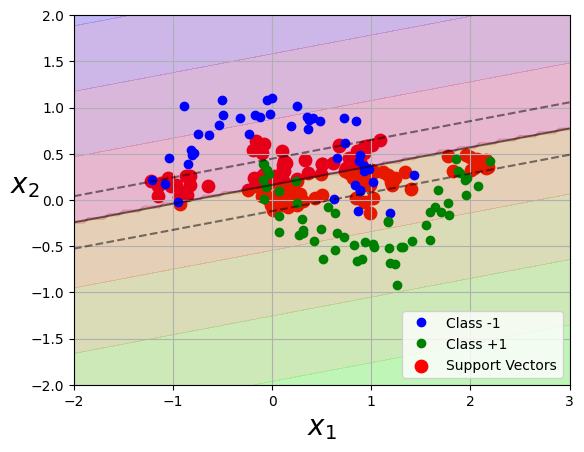

In [63]:
from sklearn import metrics
# Linear SVM
linear_svm = MySVM(C=2, kernel=linear_kernel)
linear_svm.fit(X_train, y_train)

y_pred = linear_svm.predict(X_test)

# plot the model using provided plot_svm
plot_svm(linear_svm, X_test, y_test)
# code for precision/recall/confusion from sklearn docs: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))


For the Linear Model my custom SVM actually works slightly better than the standard library version of linear SVC. It has slightly better precision and accuracy and the exact same recall values. The confusion matrix also has one less False Positive and one more True Negative.

     pcost       dcost       gap    pres   dres
 0: -1.6497e+02 -6.0180e+02  6e+03  7e+00  4e-13
 1: -8.3874e+01 -5.1021e+02  1e+03  1e+00  3e-13
 2: -6.1094e+01 -3.0053e+02  4e+02  2e-01  2e-13
 3: -5.8426e+01 -1.6307e+02  1e+02  8e-02  9e-14
 4: -6.1391e+01 -1.0831e+02  7e+01  4e-02  7e-14
 5: -6.2206e+01 -9.1332e+01  4e+01  2e-02  8e-14
 6: -6.2282e+01 -8.2696e+01  3e+01  1e-02  7e-14
 7: -6.2717e+01 -7.3617e+01  2e+01  6e-03  6e-14
 8: -6.3373e+01 -6.8116e+01  7e+00  2e-03  8e-14
 9: -6.3904e+01 -6.5231e+01  2e+00  4e-04  7e-14
10: -6.4255e+01 -6.4336e+01  1e-01  2e-05  8e-14
11: -6.4278e+01 -6.4283e+01  6e-03  1e-06  8e-14
12: -6.4280e+01 -6.4280e+01  6e-05  1e-08  8e-14
Optimal solution found.
149 support vectors out of 400 points
[[37  8]
 [ 0 55]]
0.873015873015873
1.0
0.92


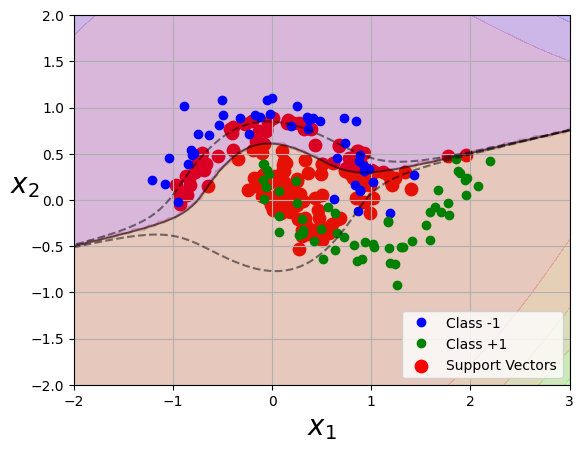

In [64]:
from sklearn import metrics
# Poly SVM
# tuned hyperparams from the library poly_svm (cant control coef0) (C=0.5, coef0=1, degree=5, kernel='poly', random_state=42)
poly_svm = MySVM(C=0.5, kernel=polynomial_kernel)
poly_svm.fit(X_train, y_train)

y_pred = poly_svm.predict(X_test)

# plot the model using provided plot_svm
plot_svm(poly_svm, X_test, y_test)
# code for precision/recall/confusion from sklearn docs: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

When testing my polynomial SVM code, the results are similar to the SVC polynomial library code, however they are slightly worse. The precision and accuracy for the library polynomal was 0.95 and 0.97 respectively; however for my custom implementation I only achieved 0.87 and 0.92, which may be due to the fact that the library polynomial code has other hyperparameters such as coef0 that can help improve the model that I did not have access to for the custom implementation.

As seen below I redid the polynomial SVC library code with the exact parameters that I passed into my custom function, and yet again it did better when having the exact same parameters. In the case below the precision and accuracy were 0.846 and 0.9 respectively, which are both less than my custom implementation achieved.

[[35 10]
 [ 0 55]]
0.8461538461538461
1.0
0.9


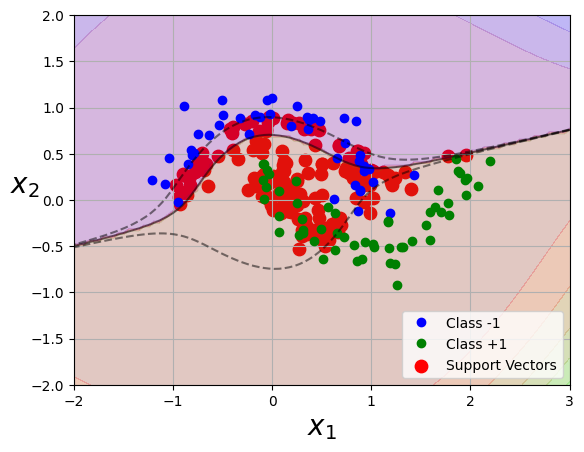

In [67]:
new_poly = SVC(C=0.5, kernel="poly", degree=5)
new_poly.fit(X_train, y_train)
y_pred = new_poly.predict(X_test)

# plot the model using provided plot_svm
plot_svm(new_poly, X_test, y_test)
# code for precision/recall/confusion from sklearn docs: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

     pcost       dcost       gap    pres   dres
 0: -1.7383e+01 -5.5397e+03  1e+04  6e-01  8e-15
 1:  7.3661e+01 -1.0144e+03  1e+03  2e-15  7e-15
 2: -6.9696e+01 -3.7525e+02  3e+02  1e-14  6e-15
 3: -9.5704e+01 -3.2234e+02  2e+02  1e-14  5e-15
 4: -1.1871e+02 -2.7049e+02  2e+02  6e-15  5e-15
 5: -1.2922e+02 -2.4793e+02  1e+02  5e-15  5e-15
 6: -1.3935e+02 -2.2291e+02  8e+01  7e-15  5e-15
 7: -1.4839e+02 -2.0226e+02  5e+01  2e-15  5e-15
 8: -1.5753e+02 -1.8335e+02  3e+01  6e-15  7e-15
 9: -1.6132e+02 -1.7588e+02  1e+01  2e-14  8e-15
10: -1.6479e+02 -1.7039e+02  6e+00  6e-15  7e-15
11: -1.6674e+02 -1.6745e+02  7e-01  1e-14  8e-15
12: -1.6706e+02 -1.6707e+02  9e-03  2e-14  8e-15
13: -1.6707e+02 -1.6707e+02  9e-05  2e-14  8e-15
Optimal solution found.
48 support vectors out of 400 points
[[42  3]
 [ 0 55]]
0.9482758620689655
1.0
0.97


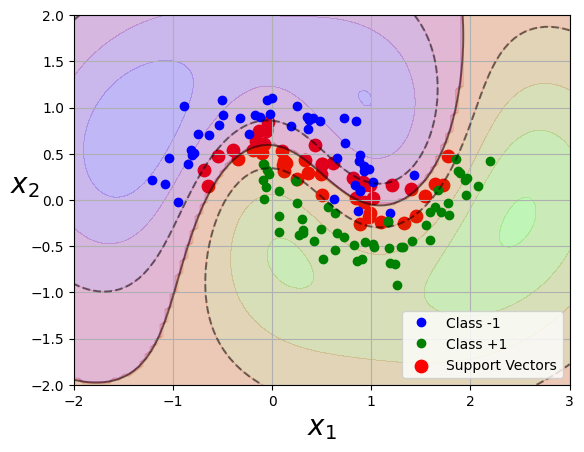

In [69]:
# Gaussian
from sklearn import metrics
# Poly SVM
# tuned hyperparams from the library rbf_SVM SVC(C=5, gamma=0.5, random_state=42) (can adjust gamma's default in kernel function code*)
rbf_SVM = MySVM(C=5, kernel=rbf_kernel)
rbf_SVM.fit(X_train, y_train)

y_pred = rbf_SVM.predict(X_test)

# plot the model using provided plot_svm
plot_svm(rbf_SVM, X_test, y_test)
# code for precision/recall/confusion from sklearn docs: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

For the Gaussian RBF Kernel, my custom implementation actually performed exactly the same as the provided SVC library code. The confusion matrix, precision, recall, and accuracy scores all completely match, which is somewhat hard to believe, but reassuring that my implementation is correct.

**Learning Experience**

Overall this assignment increased my understanding of how SVM works significantly. This assignment made me realize how useful tracking all of the metadata for the support vectors was, just by keeping track of a[i], y[i], and X[i] at the beginning of the program made my life significantly easier to calculate w, b, and the y_predict values at the end. I also grew more comfortable with the mathematics behind SVM as well as distinguishing the difference between linear and non-linear SVM. I started to gain this understanding when I had to rederive "b" term without using "W". At first I was confused as to why we could not re-use the "w" term as that was how it was done on the slides. Then I realized that if we did re-use W, then applying the kernel trick later on would not matter as much as we would waste a lot of efficiency on slowly calculating "b". From there I got a deeper understanding of the kernel trick, as I used it to eliminate the "w" term from calculating "b" so that the code would be much more efficient. I also gained a significant understanding of the math through Task #6, and fully understood how the decision boundary/prediction was solely being determined from the support vectors that were calculated earlier. Overall SVM greatly confused me before this assignment, but by going through the process of implementing it on my own, I have a much deeper understanding of all the math behind it/why it is so useful of a model.

## Get Help?
In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [lecture 10](https://drive.google.com/open?id=1CeBhepjDKBaFBq2BZq-zNQs-MC8ll7aL4qAF8TJ24FM) and [lecture 10b](https://drive.google.com/open?id=13BidUAs_c2QdZkf92axt2S748sbnbI9Hgxg-fzb-OuU) and/or the textbook
 * Talk to the TA, they are available and there to help you during office hour.
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Assignment 3:...".

Part of the codes used in this assignment is modified from Mathieu Blondel under the 3-Clause BSD License. Best of luck and have fun!